In [1]:
library('forecast')
library('tseries')

In [2]:
# Read CSV into R
MyData <- read.csv(file="MyData.csv", header=TRUE, sep=",")

In [3]:
balance_account <- ts(MyData$x, start=c(17, 9), end=c(21, 9), frequency=24)

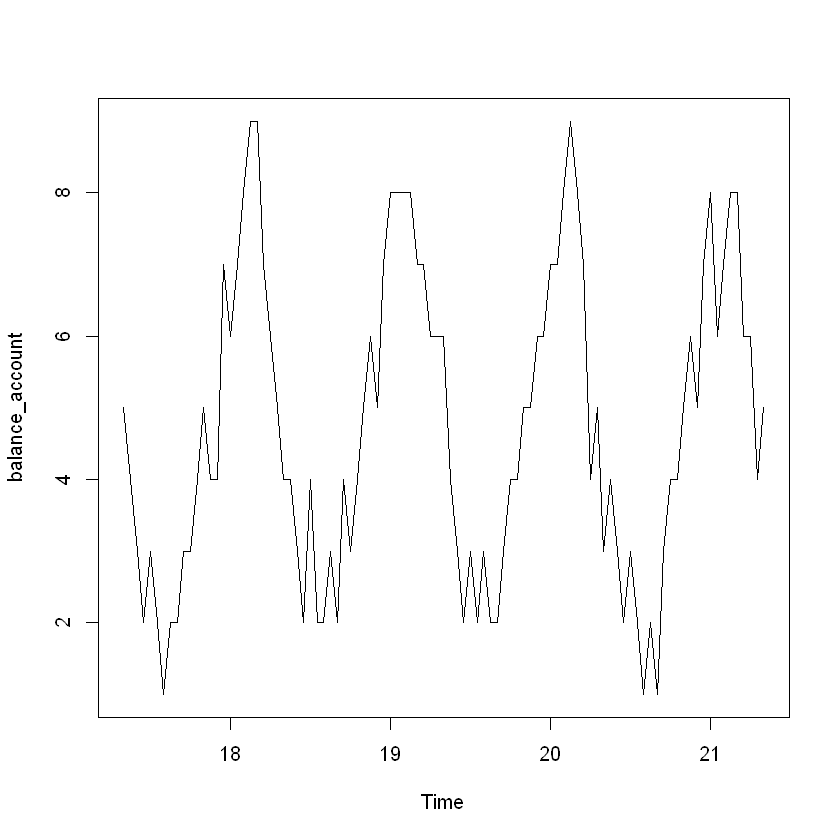

In [4]:
plot(balance_account)

In [5]:
adf.test(balance_account, alternative = "stationary")

Warning message in adf.test(balance_account, alternative = "stationary"):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  balance_account
Dickey-Fuller = -4.3931, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


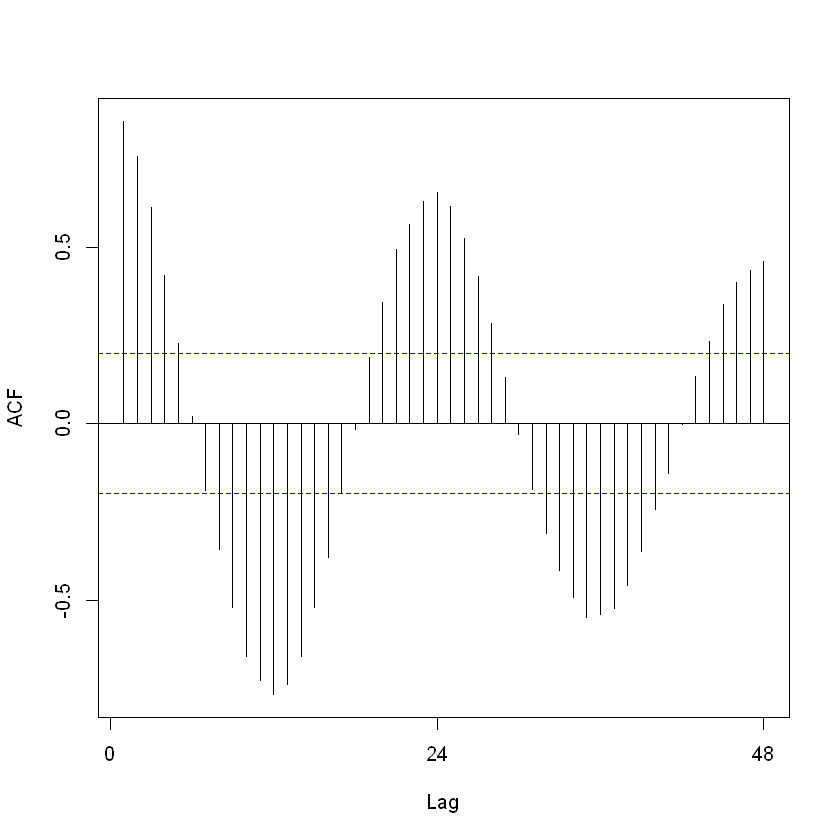

In [6]:
Acf(balance_account, main='')

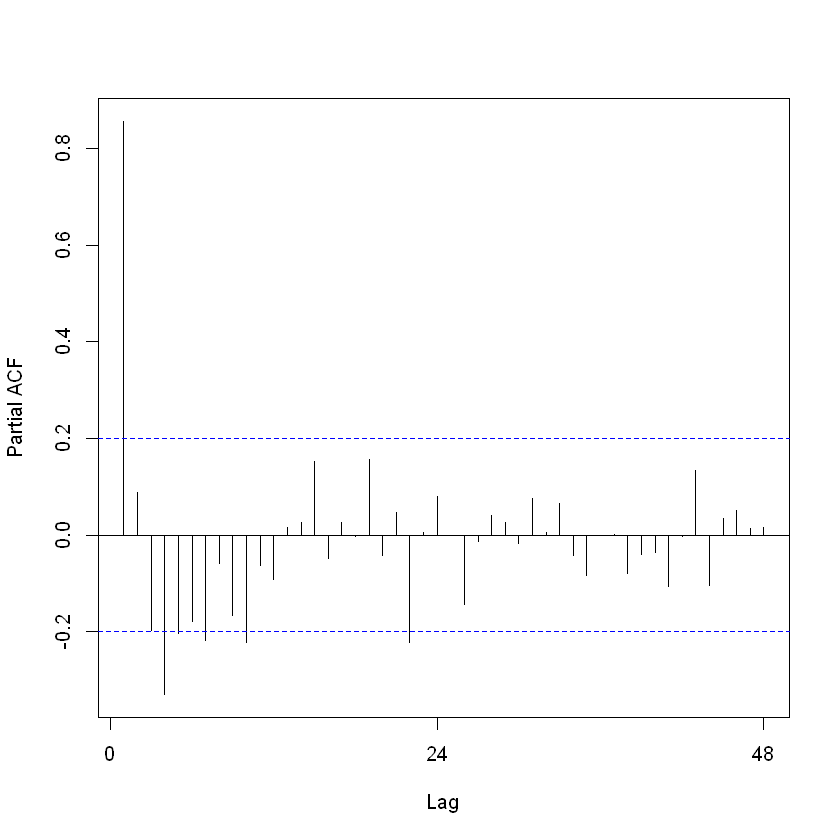

In [7]:
Pacf(balance_account, main='')


	Augmented Dickey-Fuller Test

data:  balance_account1
Dickey-Fuller = -3.289, Lag order = 4, p-value = 0.07748
alternative hypothesis: stationary


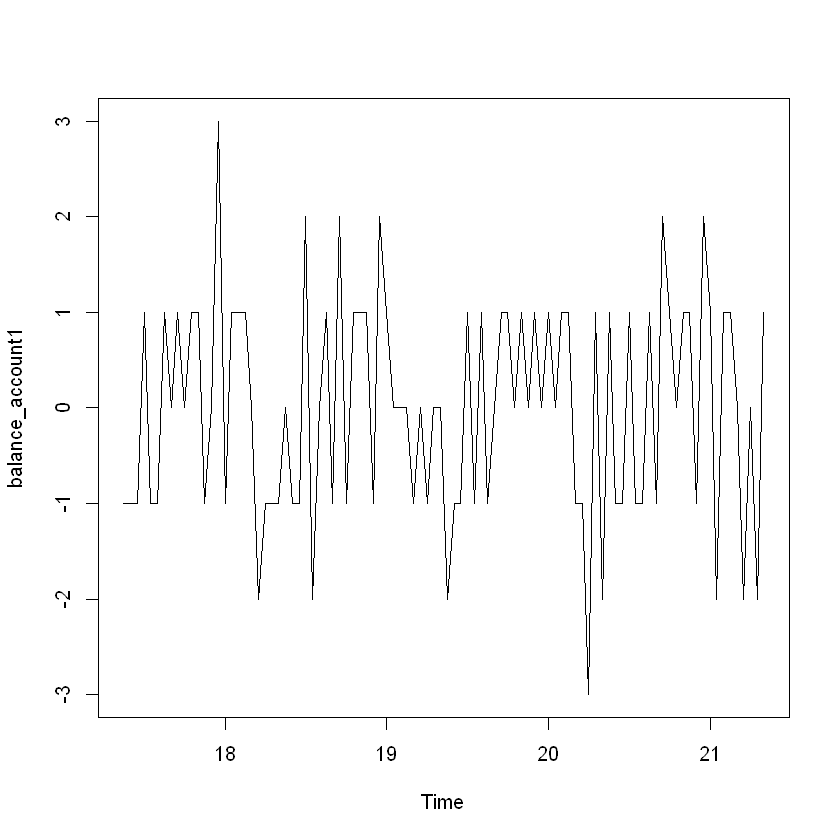

In [8]:
balance_account1 = diff(balance_account, differences = 1)
plot(balance_account1)
adf.test(balance_account1, alternative = "stationary")

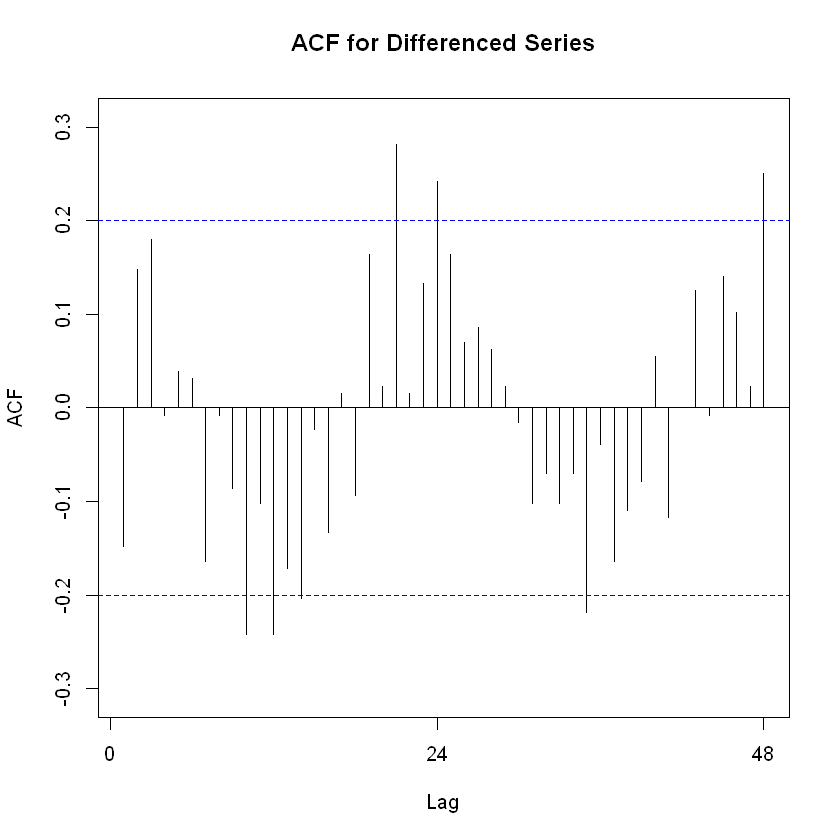

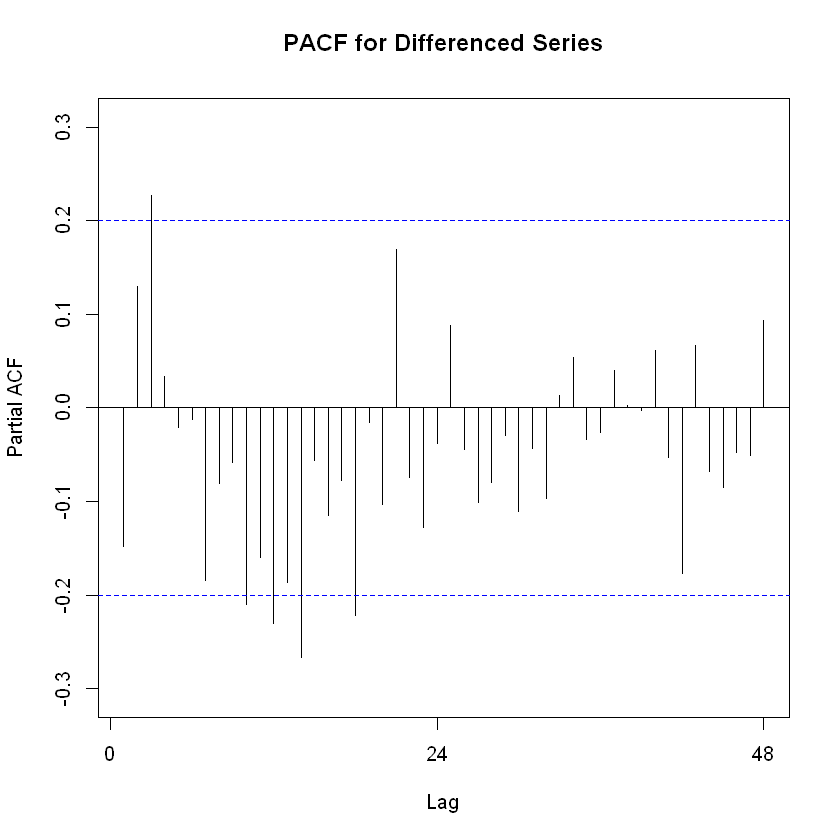

In [9]:
Acf(balance_account1, main='ACF for Differenced Series')
Pacf(balance_account1, main='PACF for Differenced Series')

In [10]:
auto.arima(balance_account, seasonal=TRUE)

Series: balance_account 
ARIMA(4,0,0)            with non-zero mean 

Coefficients:
         ar1     ar2     ar3      ar4    mean
      0.7245  0.3305  0.0709  -0.3436  4.7565
s.e.  0.0944  0.1223  0.1216   0.0961  0.4678

sigma^2 estimated as 1.082:  log likelihood=-139.88
AIC=291.76   AICc=292.69   BIC=307.21

In [11]:
fit <- auto.arima(balance_account, seasonal=TRUE)

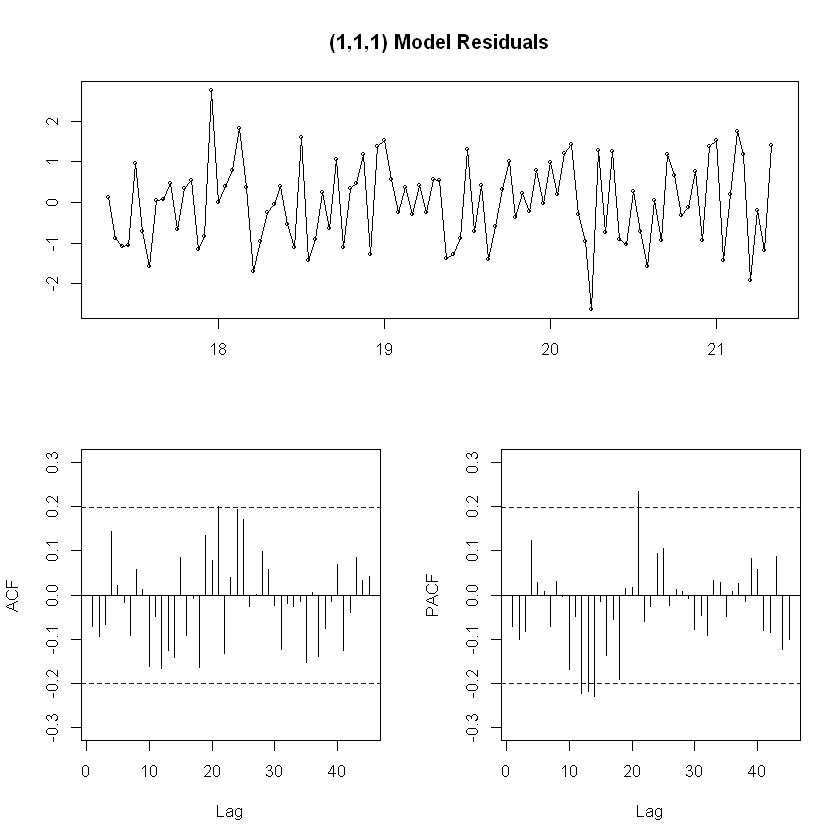

In [12]:
tsdisplay(residuals(fit), lag.max=45, main='(1,1,1) Model Residuals')

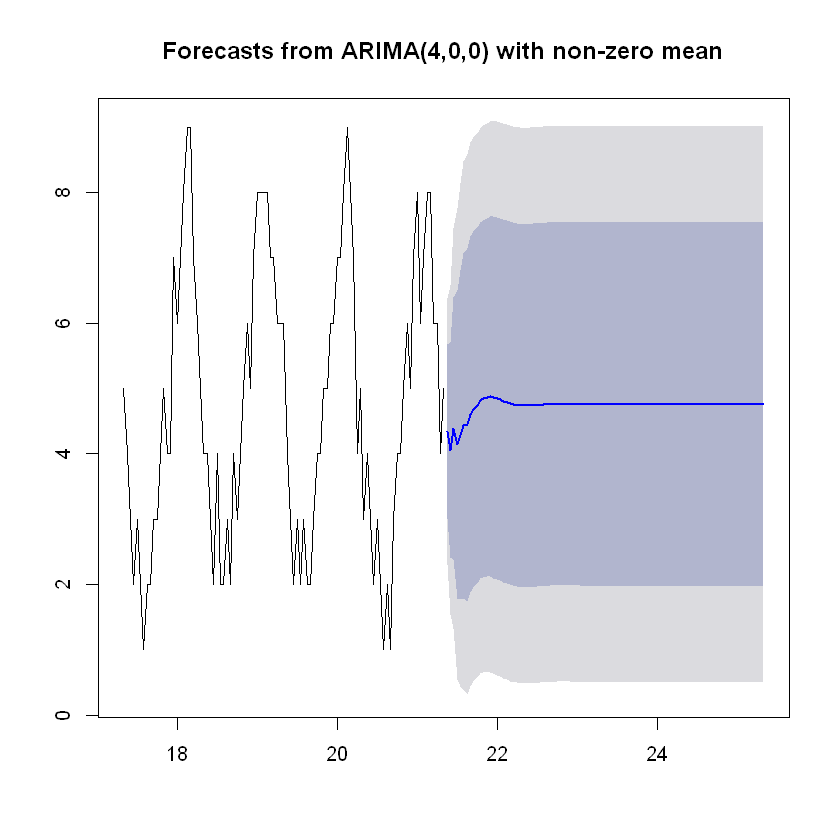

In [13]:
fcast <- forecast(fit, h=24*4)
plot(fcast)

In [14]:
fit2 <- arima(balance_account, order = c(24,0,0))

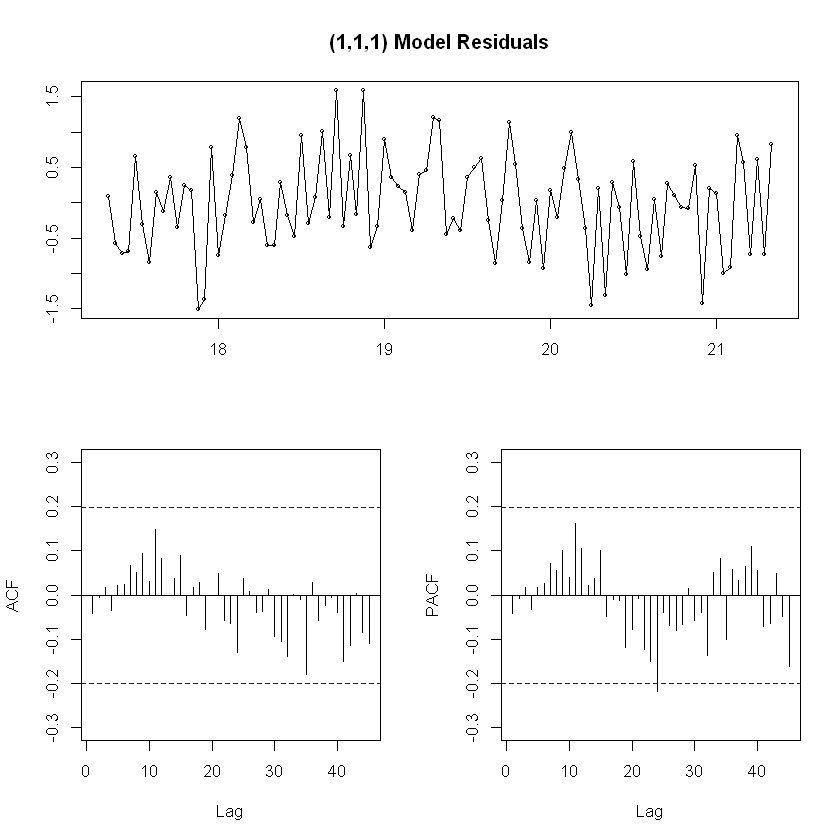

In [15]:
tsdisplay(residuals(fit2), lag.max=45, main='(1,1,1) Model Residuals')

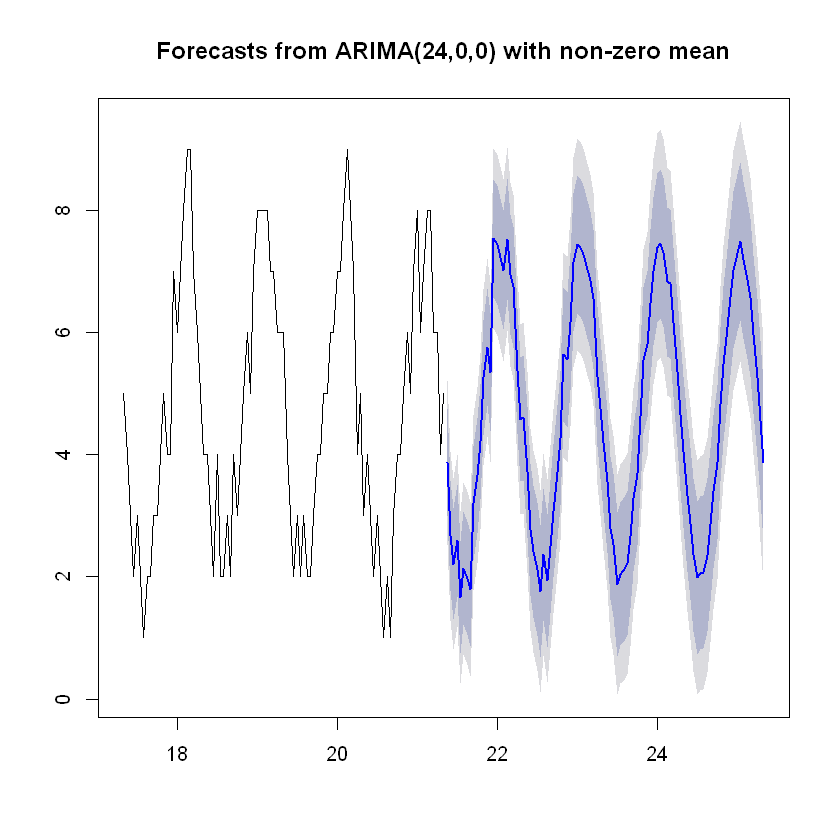

In [16]:
fcast2 <- forecast(fit2, h=24*4)
plot(fcast2)